In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.morphology import reconstruction
import gc
%matplotlib inline
import data_utils



In [2]:
def division(x):
    b1 = np.array(x["band_1"])
    #print (b1.shape)
    b2 = np.array(x["band_2"])
   #print (b2.shape)
    #print (np.divide(b1, b2, out=np.zeros_like(b1), where=b2!=0))
    #print ((np.divide(b1, b2, out=np.zeros_like(b1), where=b2!=0 )).reshape(-1).shape)
    #print (type(np.divide(b1, b2, out=np.zeros_like(b1), where=b2!=0)))
    return list(np.divide(b1, b2, out=np.zeros_like(b1), where=b2!=0 ))

def division2(x):
    b1 = np.array(x["band_7"])
    b2 = np.array(x["band_8"])
    return list(np.divide(b1, b2, out=np.zeros_like(b1), where=b2!=0 ))

def division3(x):
    b1 = np.array(x["band_13"])
    b2 = np.array(x["band_14"])
    return list(np.divide(b1, b2, out=np.zeros_like(b1), where=b2!=0 ))

def divisionn(x,y):
    return x/y

def iso(arr):
    p = np.reshape(np.array(arr), [75,75]) >(np.mean(np.array(arr))+1.5*np.std(np.array(arr)))
    return p * np.reshape(np.array(arr), [75,75])

def isoWithFilter(arr):
    image = (np.reshape(np.array(arr).astype('float64'), [75,75]))
    image = gaussian_filter(image,1)
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.min()
    mask = image 
    dilated = reconstruction(seed, mask, method='dilation')
    return image-dilated

#channel normalization
def ChannelNormalization(band):
    #print (band)
    band = band - np.mean(band,axis=(1,2), keepdims=True)
    #print(band)
    band /= np.std(band,axis=(1,2),keepdims=True)
    return band
    
#pixel normalization
def PixelNormalization(band):
    band = band - np.mean(band,axis=0, keepdims=True)
    band /= np.std(band,axis=0,keepdims=True)
    return band

In [3]:
train = pd.read_json('train.json')

train = train.loc[:100]
gc.collect()

train['inc_angle'] = pd.to_numeric(train['inc_angle'],errors='coerce')

train['band_1'] = train['band_1'].apply(lambda x: np.array(x).astype('float64').reshape(75, 75))
train['band_2'] = train['band_2'].apply(lambda x: np.array(x).astype('float64').reshape(75, 75))
train['band_3'] = (train['band_1']+train['band_2'])/2
train['band_4'] = train['band_1']-train['band_2']
train['band_5'] = train['band_1']*train['band_2']
train['band_6'] = divisionn(train['band_1'],train['band_2'])

#train['band_6'] = train.apply(division,axis=1)
#train['band_6'] = train['band_6'].apply(lambda x: np.array(x).astype('float64').reshape(75, 75))

train['band_7'] = train.iloc[:, 0].apply(iso)
train['band_8'] = train.iloc[:, 1].apply(iso)
train['band_9'] = train['band_7']+train['band_8']
train['band_10'] = train['band_7']-train['band_8']
train['band_11'] = train['band_7']*train['band_8']
train['band_12'] = divisionn(train['band_7'],train['band_8'])
#train['band_12'] = train.apply(division,axis=1)
#train['band_12'] = train['band_12'].apply(lambda x: np.array(x).astype('float64').reshape(75, 75))

train['band_13'] = train.iloc[:, 0].apply(isoWithFilter)
train['band_14'] = train.iloc[:, 1].apply(isoWithFilter)
train['band_15'] = train['band_13']+train['band_14']
train['band_16'] = train['band_13']-train['band_14']
train['band_17'] = train['band_13']*train['band_14']
train['band_18'] = divisionn(train['band_13'],train['band_14'])
#train['band_18'] = train.apply(division3,axis=1)
#train['band_18'] = train['band_18'].apply(lambda x: np.array(x).astype('float64').reshape(75, 75))

train['band_19'] = train.iloc[:, 0].apply(data_utils.smoothImage)
train['band_20'] = train.iloc[:, 1].apply(data_utils.smoothImage)
train['band_21'] = train['band_19']+train['band_20']
train['band_22'] = train['band_19']-train['band_20']
train['band_23'] = train['band_19']*train['band_20']
train['band_24'] = divisionn(train['band_19'],train['band_20'])

# Normalization

In [4]:
for i in range(1,25):
    band = "band_" + str(i)
    train[band] = list(ChannelNormalization(np.array(list(train.loc[:,band]))))

In [6]:
train["band_4"].head()

0    [[-0.851410566492, 0.120256938785, 0.113459267...
1    [[2.45387064404, 0.41767020234, -0.02208322467...
2    [[-0.496279941701, -0.75060864298, -1.96153376...
3    [[-0.30572298101, -0.636475345679, -1.05734973...
4    [[0.274937556078, 2.17643664773, 2.17643664773...
Name: band_4, dtype: object

In [ ]:
print("band_1")
print(train.loc[0,"band_1"])
print("band_2")
print(train.loc[0,"band_2"])
print("band_3")
print(train.loc[0,"band_3"])
print("band_4")
print(train.loc[0,"band_4"])
print("band_5")
print(train.loc[0,"band_5"])
print("band_6")
print(train.loc[0,"band_6"])
print("band_7")
print(train.loc[0,"band_7"])

In [ ]:

df = pd.DataFrame({'code': [101, 102, 103, 105, 107, 110],
                   'apple price': [101, 123, np.nan, 123, 165, 123],
                   'mangoes price': [np.nan, 123, np.nan, 167, np.nan, np.nan],
                   'watermelon price': [np.nan, np.nan, np.nan, np.nan, 177, np.nan],
                   'market price': [122, 124, 123, 154, 176, 123]})

# Calculate difference to apple price
df['diff'] = df['market price'] - df['apple price']
# Overwrite with difference to mangoes price
df['diff'] = df.apply(lambda x: x['market price'] - x['mangoes price'] if not np.isnan(x['mangoes price']) else x['diff'], axis=1)
# Overwrite with difference to watermelon price
df['diff'] = df.apply(lambda x: x['market price'] - x['watermelon price'] if not np.isnan(x['watermelon price']) else x['diff'], axis=1)

# Histogram of a channel..(Pixels..)

0


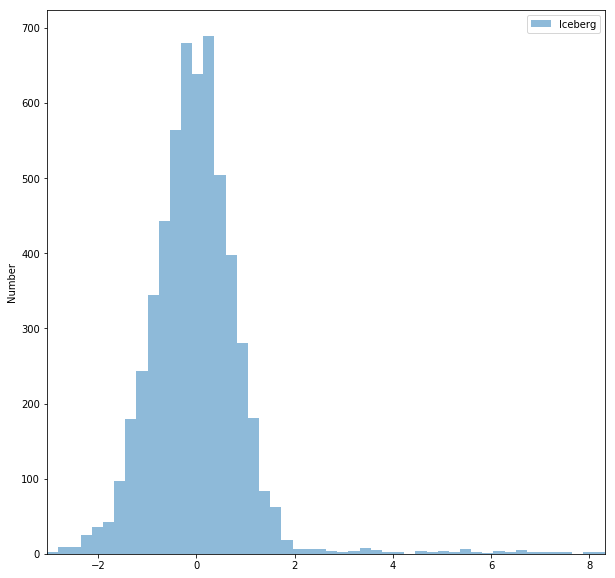

In [5]:
plt.rcParams['figure.figsize'] = (10, 10) # set default size of plots
ind = 1
histData = train.loc[ind,"band_1"]
print (train.loc[ind,"is_iceberg"])
plt.hist(list(histData.reshape(-1)),range=[np.min(histData),np.max(histData)],
             bins=50,alpha=0.5,label='Iceberg')
plt.legend()
plt.xlim([np.min(histData),np.max(histData)])
plt.ylabel('Number')
plt.show()

# Visualization..

In [6]:
plt.rcParams['figure.figsize'] = (18, 18) # set default size of plots

In [7]:

def plot(base,channel,totalElement):
#base = 0

    for i in range(0,totalElement,5):
        for j in range (5):
            plt.subplot(1, 5, j+1)
            arr = np.reshape(np.array(train.loc[i+j+base,"band_"+ str(channel)]),(75,75))
            plt.imshow(arr, cmap='inferno')
            plt.title(("iceberg" if train.iloc[i+j+base,4] == 1 else "ship") + " id is " + str(i+j+base))

        plt.show()


In [8]:
base = 0
totalElement = 10

# Original bands

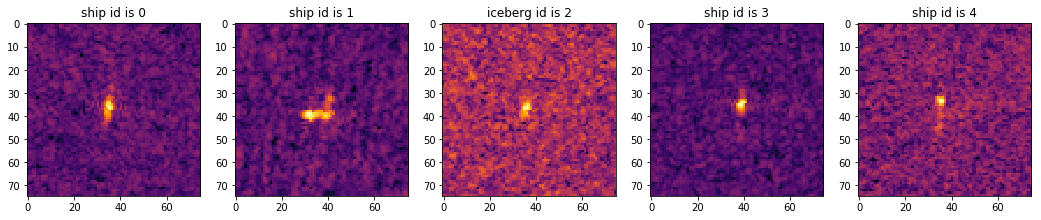

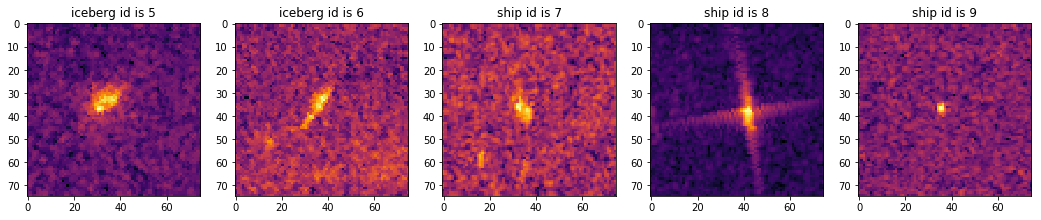

In [9]:
plot(base,1,totalElement)

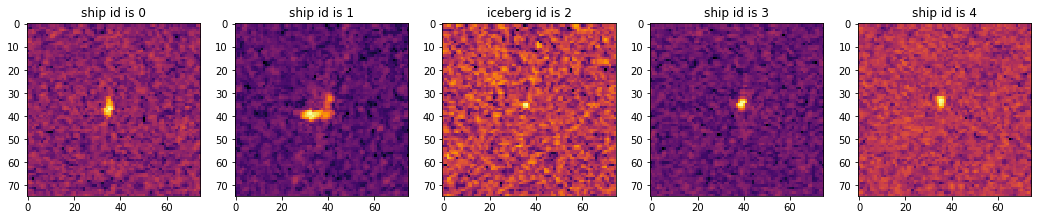

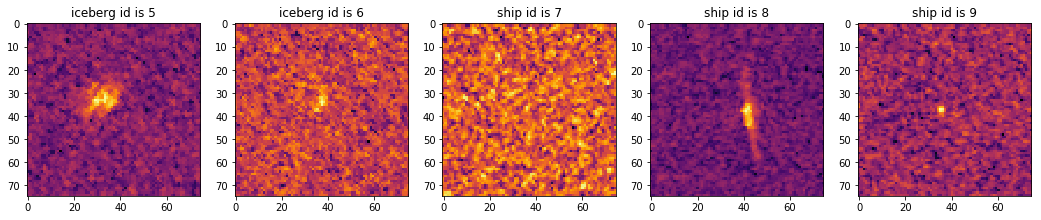

In [10]:
plot(base,2,totalElement)

# Original Bands, Sum, Difference, Multiply, Division

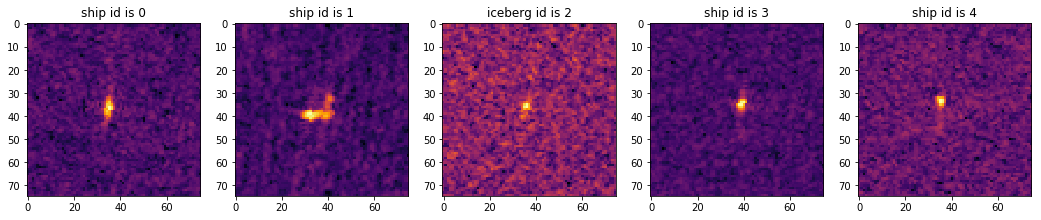

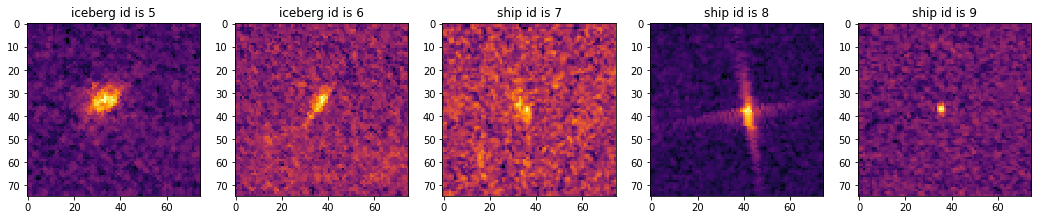

In [11]:
plot(base,3,totalElement)

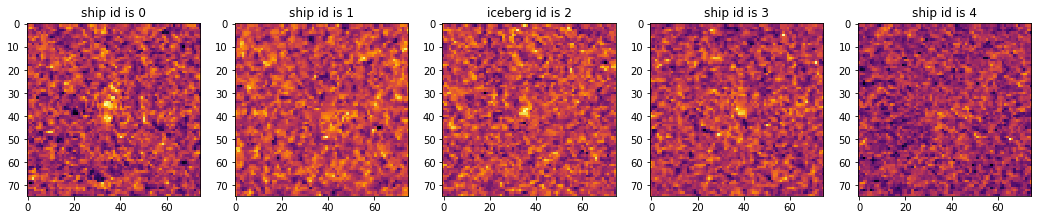

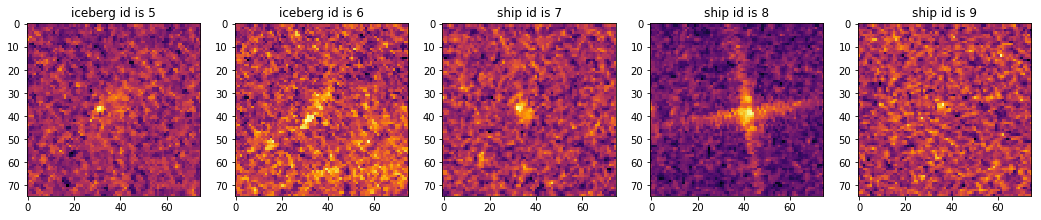

In [12]:
plot(base,4,totalElement)

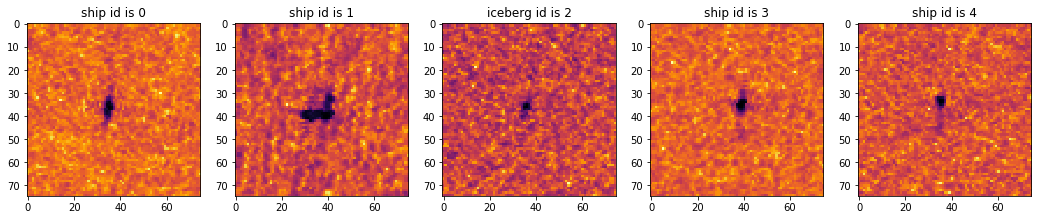

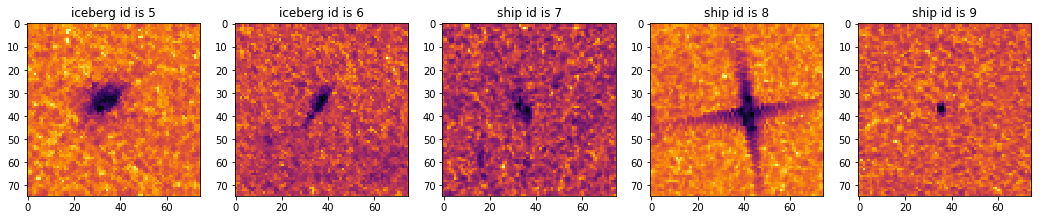

In [13]:
plot(base,5,totalElement)

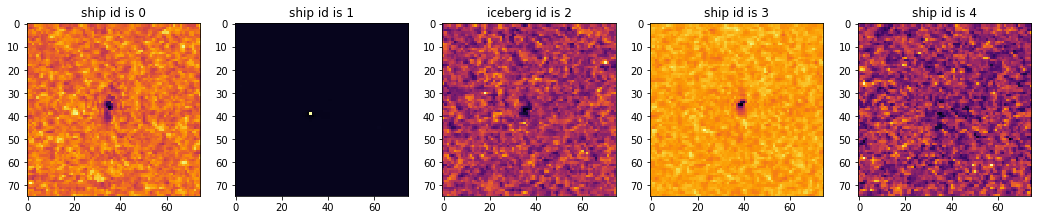

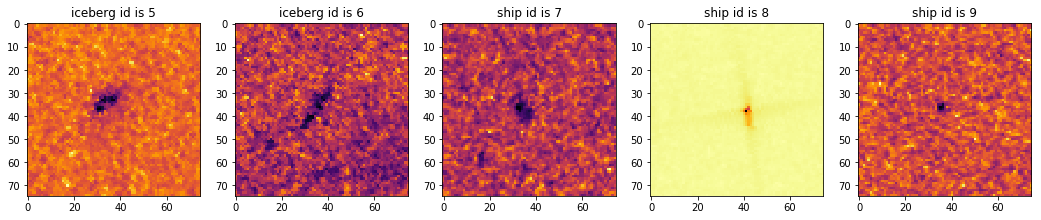

In [14]:
plot(base,6,totalElement)

# Basic Iso!

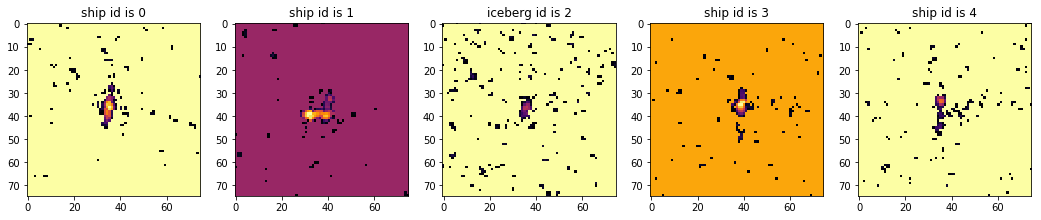

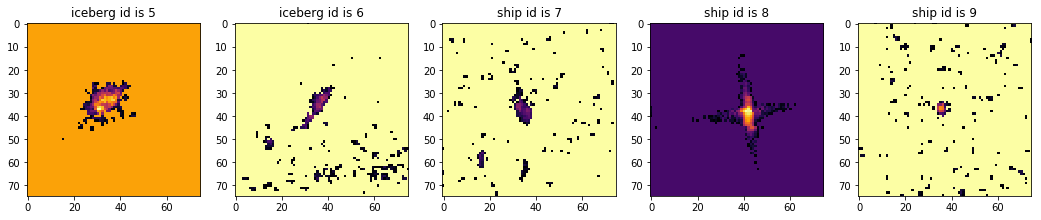

In [15]:
plot(base,7,totalElement)

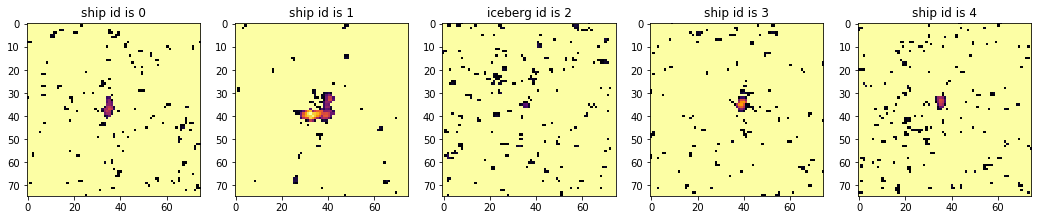

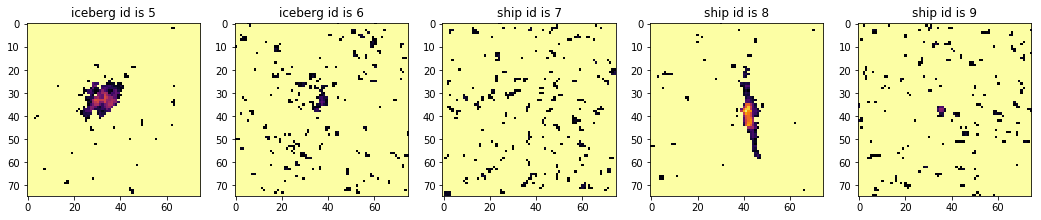

In [16]:
plot(base,8,totalElement)

# Basic Iso, Bands, Sum, Difference, Multiply, Division

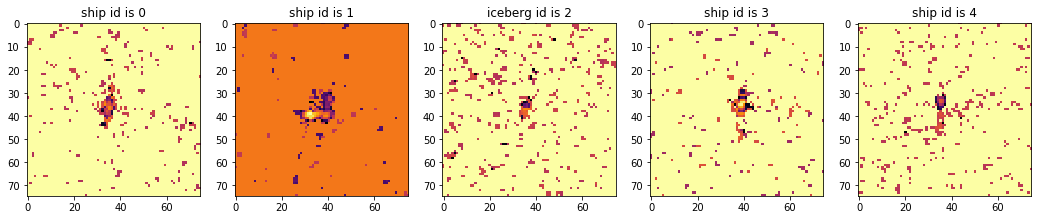

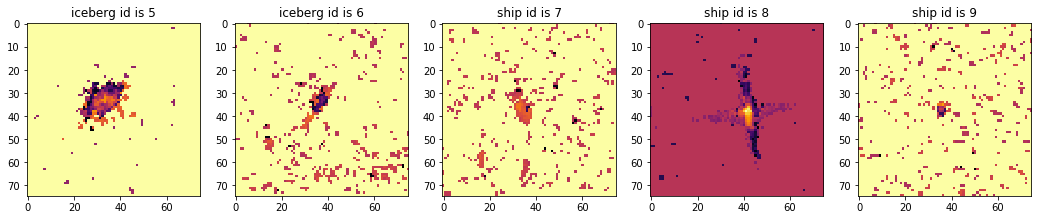

In [17]:
plot(base,9,totalElement)

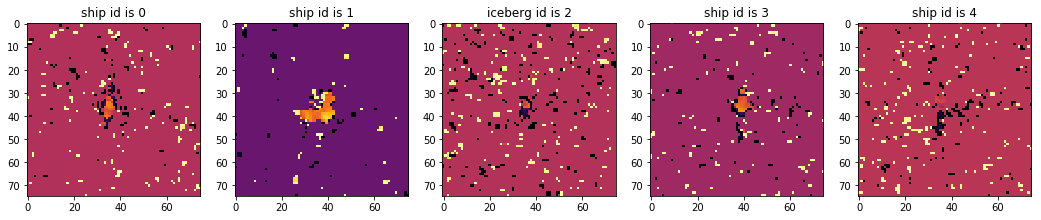

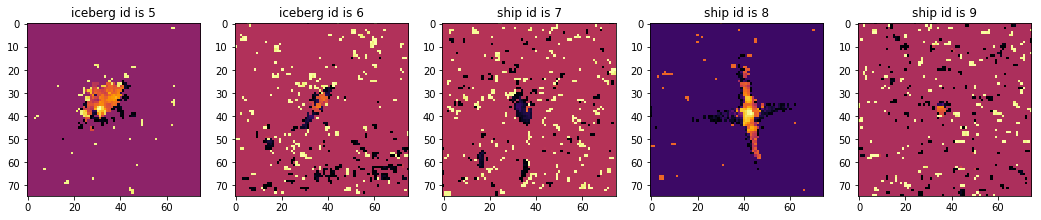

In [18]:
plot(base,10,totalElement)

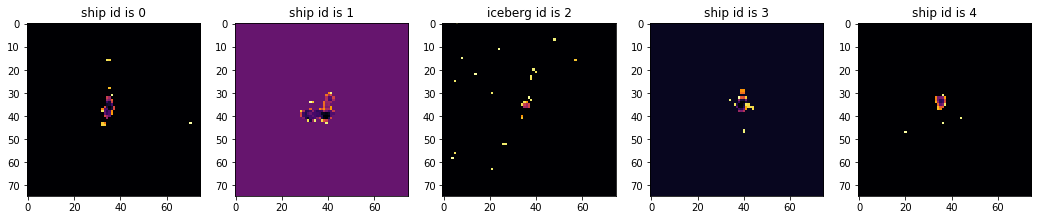

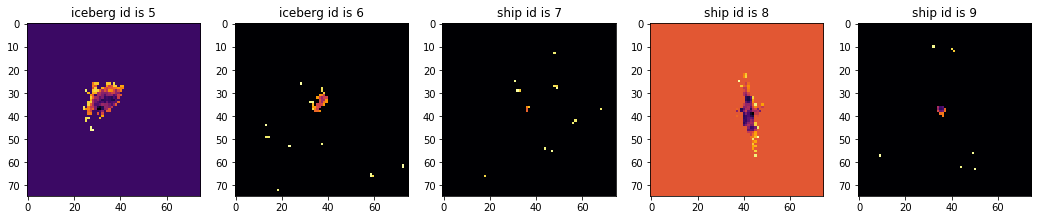

In [19]:
plot(base,11,totalElement)

In [20]:
plot(base,12,totalElement)

AttributeError: 'MaskedConstant' object has no attribute '_fill_value'

AttributeError: 'MaskedConstant' object has no attribute '_fill_value'

# Iso with Smoothing..

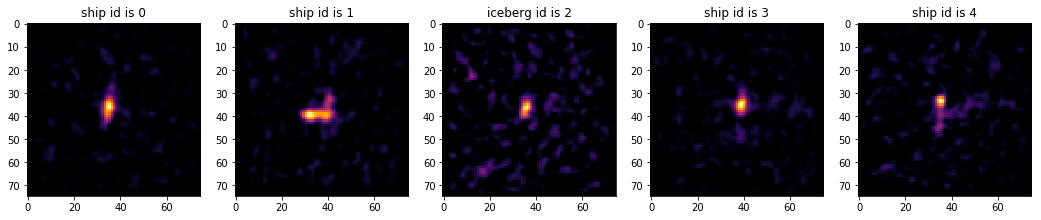

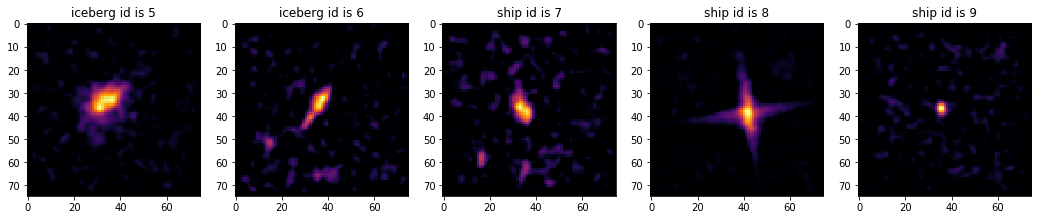

In [21]:
plot(base,13,totalElement)

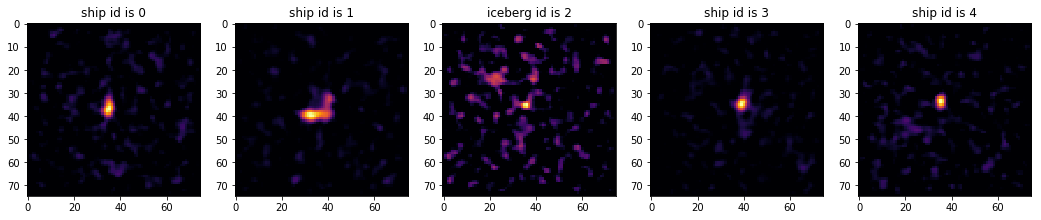

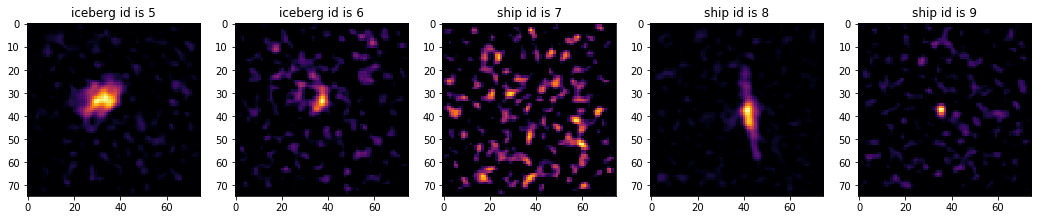

In [22]:
plot(base,14,totalElement)

# Iso with Smoothing: Sum, Minus, Multiply, Division..

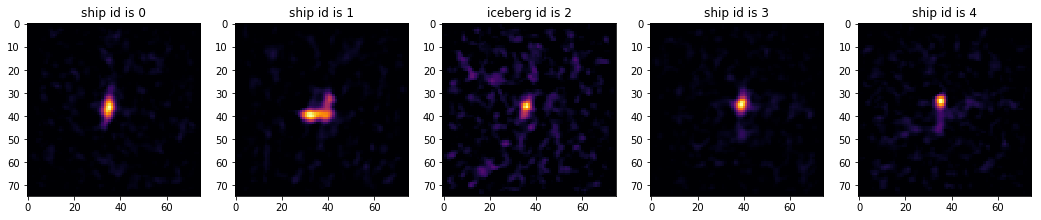

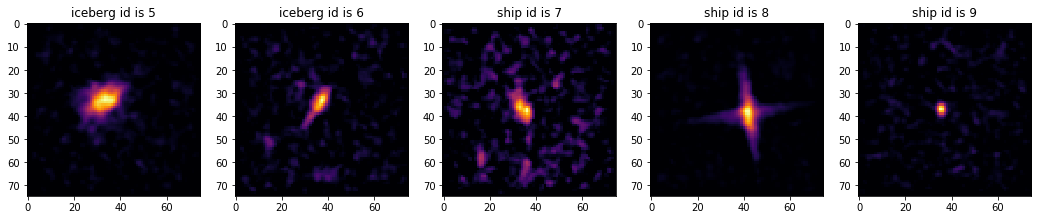

In [23]:
plot(base,15,totalElement)

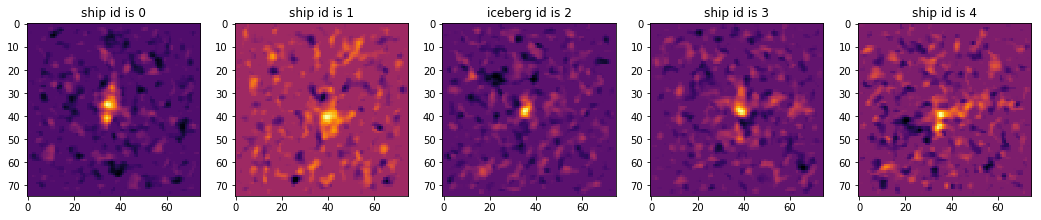

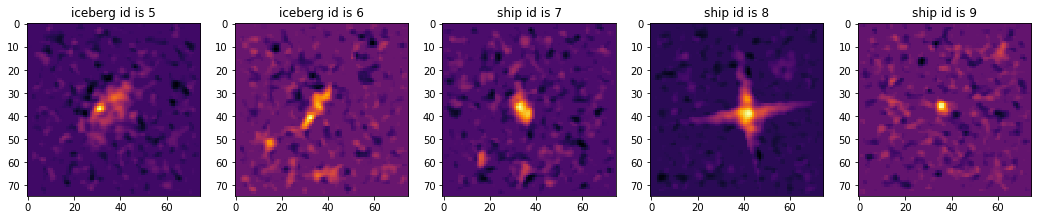

In [24]:
plot(base,16,totalElement)

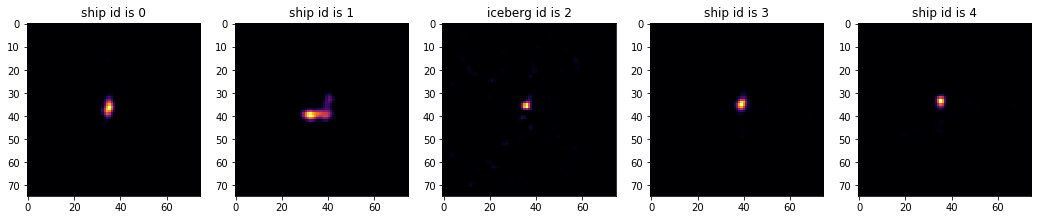

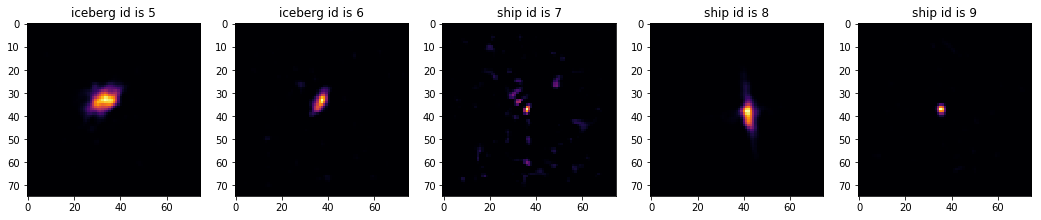

In [25]:
plot(base,17,totalElement)

In [26]:
plot(base,18,totalElement)

AttributeError: 'MaskedConstant' object has no attribute '_fill_value'

AttributeError: 'MaskedConstant' object has no attribute '_fill_value'

# data_utils.smoothImage 

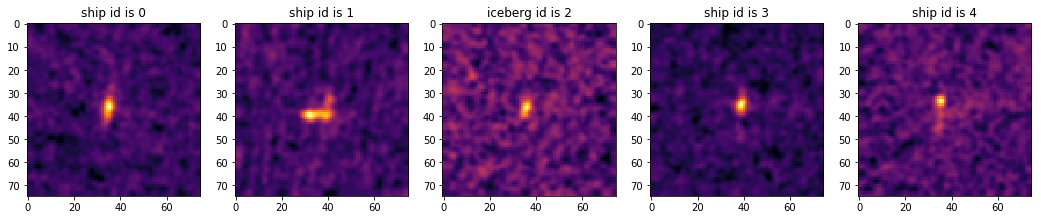

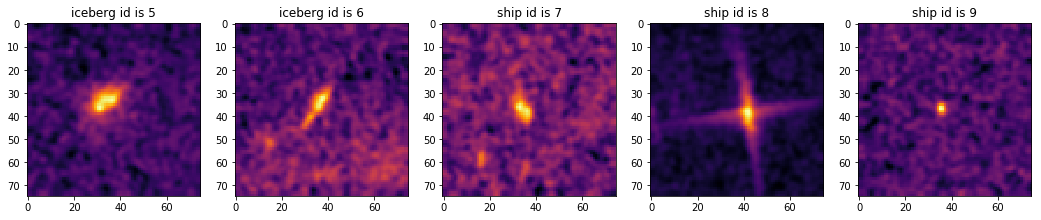

In [27]:
plot(base,19,totalElement)

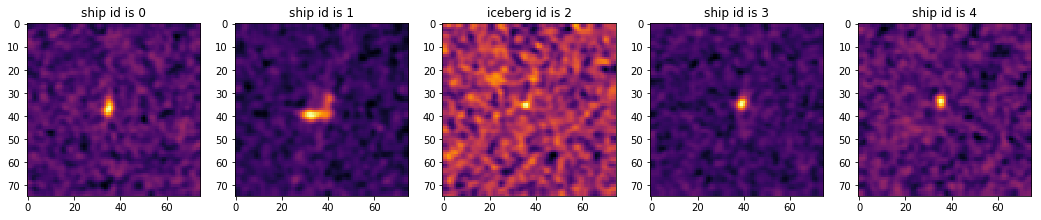

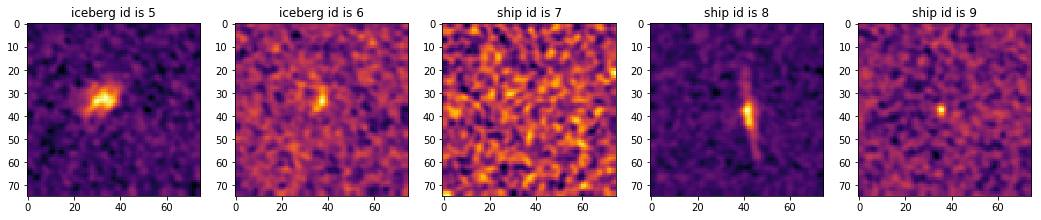

In [28]:
plot(base,20,totalElement)

# data_utils.smoothImage: Sum, Minus, Multiply, Division..

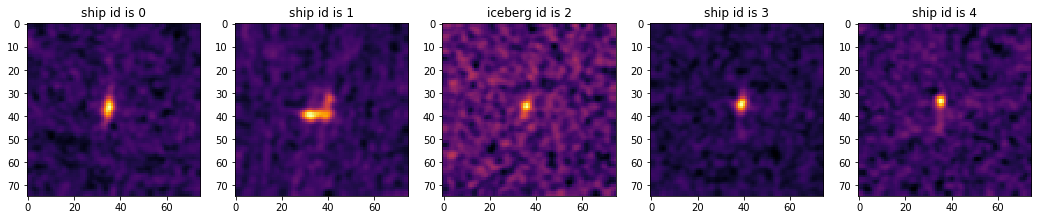

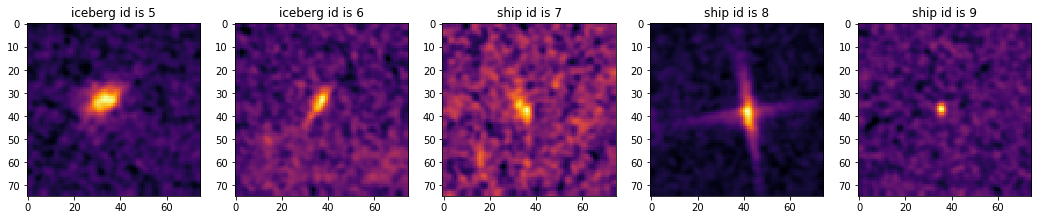

In [29]:
plot(base,21,totalElement)

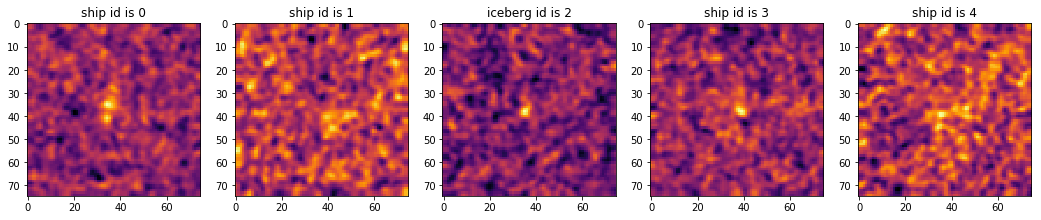

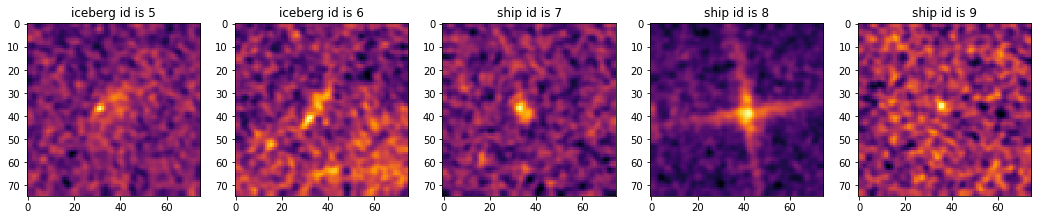

In [30]:
plot(base,22,totalElement)

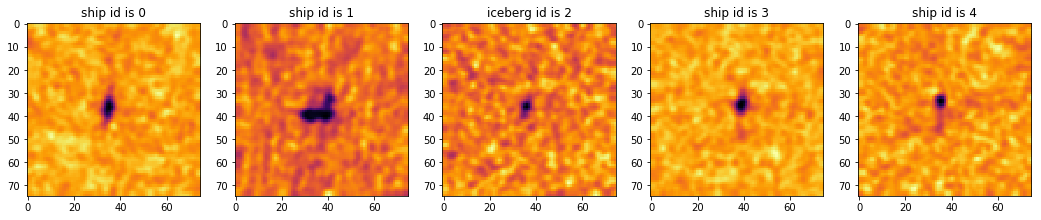

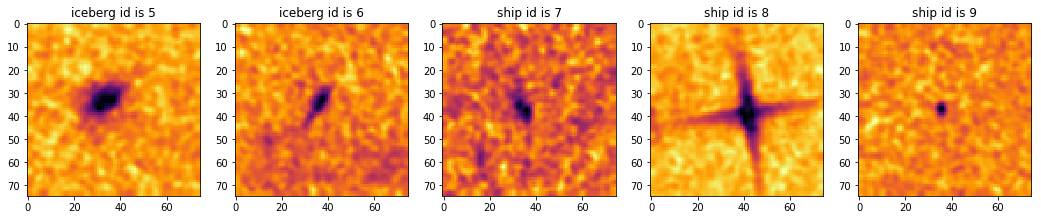

In [31]:
plot(base,23,totalElement)

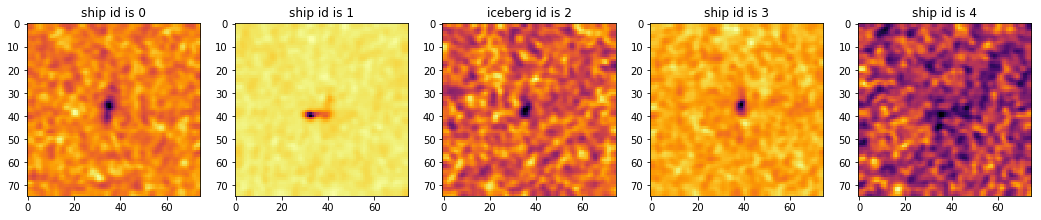

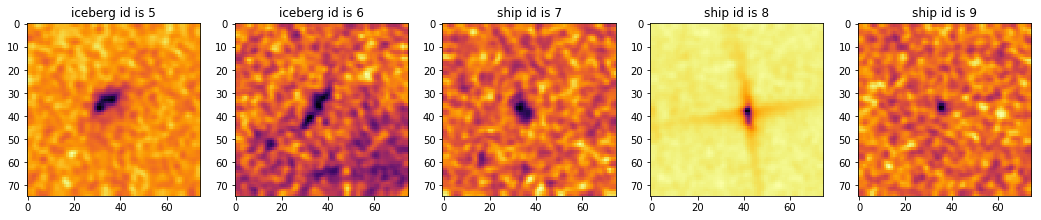

In [32]:
plot(base,24,totalElement)

# We can't apply apply function on Dataframe if we have numpy array in it!!..

In [ ]:
df = pd.DataFrame(np.arange(1,10).reshape(3,3))
print (df)
df['a1'] = list(np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3))
df['a2'] = list(np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3))
print (df)
df['a3'] = df.apply(lambda x: list(np.array((x['a1'])-np.array((x['a1'])))),axis=1)
print (df)

# Numpy to Tensor..

In [ ]:
band_1 = np.concatenate([im for im in train['band_1']]).reshape(-1, 75, 75)
band_2 = np.concatenate([im for im in train['band_2']]).reshape(-1, 75, 75)
full_img = np.stack([band_1, band_2], axis=1)


In [ ]:
full_img.shape

In [ ]:
ind = 900
histData = train.iloc[:,1][ind]
print (train["is_iceberg"][ind])
plt.hist(histData,range=[np.min(histData),np.max(histData)],
             bins=50,color='r',alpha=0.5,label='Iceberg')
plt.legend()
plt.xlim([np.min(histData),np.max(histData)])
plt.ylabel('Number')
plt.show()

In [ ]:
a = train.iloc[0,0]

In [ ]:
r = train.iloc[0,0]
g = train.iloc[0,1]

hh = r.astype(np.float64)
hv = g.astype(np.float64)

b = np.divide(hh, hv, out=np.zeros_like(hh), where=hv!=0)

rgb = np.dstack((r, g, b.astype(np.float32)))
plt.imshow(rgb)
plt.show()

In [ ]:
np.max(b)

In [ ]:
rgb.shape

In [ ]:
q1 = np.random.rand(2,2)
q2 = np.random.rand(2,2)

In [ ]:
np.divide(q1, q2, out=np.zeros_like(q1), where=q2!=0, )